<a href="https://colab.research.google.com/github/Astra42/ImageComparison/blob/main/PictureGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
my_photo = cv2.imread('cat3.jpg')

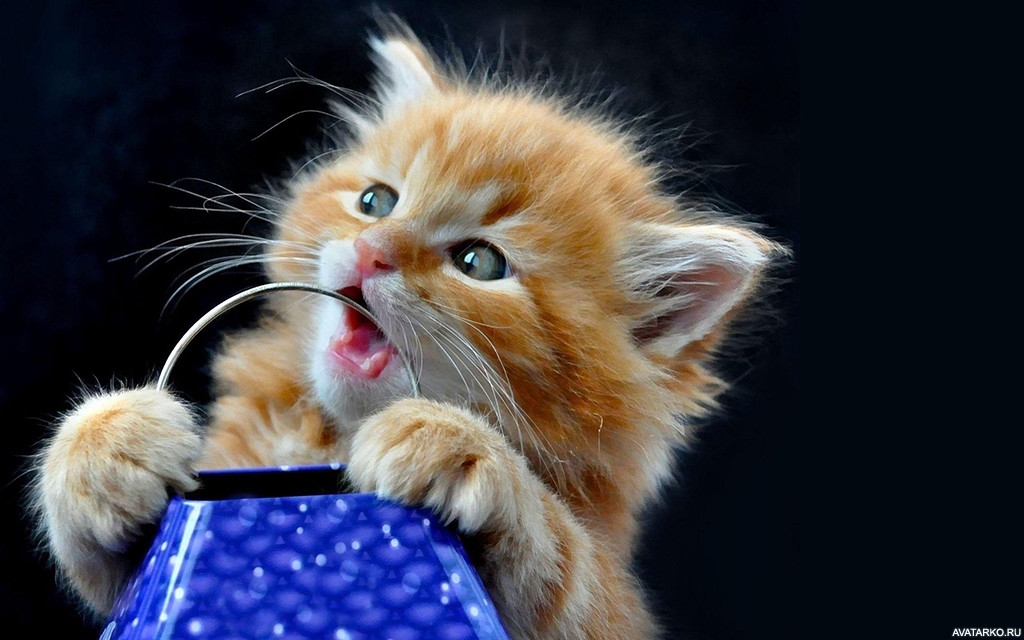

In [182]:
cv2_imshow(my_photo)

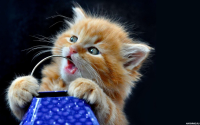

(125, 200, 3)


In [183]:
final_wide = 200
r = float(final_wide) / my_photo.shape[1]
dim = (final_wide, int(my_photo.shape[0]*r))

resized_im = cv2.resize(my_photo, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized_im)

print(resized_im.shape)

### Приницп использования класса такой 

1.   **img**
  указывается либо cv2 изображение, либо shape для произвольного фона 
2.   последовательность количества фигур

(фигуры идут по увеличению сложности круг-линия-треугольник-прямоугольник)

In [184]:
class PictureGen:
  def __init__(self, img, *args):#crcl=0, ln=0, tr=0, rctg=0, 
    if isinstance(img, tuple):
        img_shape = img
        pic = np.zeros(img_shape)
        color = self.random_color()
        [pic[:,:,i].fill(color[i]) for i in range(img_shape[-1])]
        self.img = np.array(pic)
        self.img_shape = img
    else:
      self.img_shape = img.shape
      self.img = img
    self.figures = args
    
    
  def create_figures(self):
    funcs = [self.create_circle, self.create_line, self.create_triangle, self.create_rectangle]
    for k, figure in enumerate(self.figures):
      for _ in range(figure):
        funcs[k](self.img)


    cv2_imshow(self.img)

  def random_color(self):
    return (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

  def random_point(self):
    return(np.random.randint(0,self.img_shape[0]), np.random.randint(0,self.img_shape[1]))
  
  def create_circle(self, img):
    center = self.random_point()
    cv2.circle(img, center, np.random.randint(0, min(center[0], center[1], self.img_shape[0]-center[0], self.img_shape[1]-center[1])), self.random_color(), cv2.FILLED)

  def create_line(self, img):
    cv2.line(img, self.random_point(), self.random_point(), self.random_color(), 3)

  def create_triangle(self, img):
    points = [self.random_point() for i in range(3)]
    cv2.fillPoly(img, [np.array(points)], self.random_color())

  def create_rectangle(self, img):
    cv2.rectangle(img, self.random_point(), self.random_point(), self.random_color(), cv2.FILLED)

  

## demo

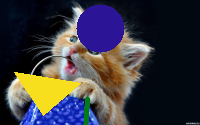

In [185]:
pg = PictureGen(resized_im,1,2,1,0) # 1 круг, 2 линии, 1 треугольник и 0 прямоугольников
pg.create_figures()



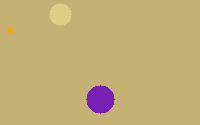

In [187]:
pg = PictureGen((125,200,3),3,0,0,0) # 3 круга, 0 линий, 0 треугольников и 0 прямоугольников
pg.create_figures()